In [1]:
""" 
Team members: Rayniel Ramirez(Y00522556)

"""

' \nTeam members: Rayniel Ramirez(Y00522556) , Albert Lozada. Course: Data Science\n\n'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import collections as c
import numpy as np
import folium
from folium.plugins import HeatMap

ht = pd.read_csv('hubway_trips.csv')
print(ht.info())

hs = pd.read_csv('hubway_stations.csv')
print(hs.info())
sns.set_style("whitegrid")
display(ht.head())
display(hs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579025 entries, 0 to 1579024
Data columns (total 13 columns):
seq_id        1579025 non-null int64
hubway_id     1579025 non-null int64
status        1579025 non-null object
duration      1579025 non-null int64
start_date    1579025 non-null object
strt_statn    1579011 non-null float64
end_date      1579025 non-null object
end_statn     1578980 non-null float64
bike_nr       1578559 non-null object
subsc_type    1579025 non-null object
zip_code      1106259 non-null object
birth_date    350644 non-null float64
gender        1106414 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 156.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
id           142 non-null int64
terminal     142 non-null object
station      142 non-null object
municipal    142 non-null object
lat          142 non-null float64
lng          142 non-null float64
status       142 non-n

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [9]:
"""
Question 1
Duration: What's the average trip duration for annual members vs. casual users?

  a) Analysis of data:
    In here we are going to work with the column subsc_type that contains all the people that are registered or casual.
    
     
  b) Approach used to generate the answer:
    We used .value_counts() to get the total of registered and casual seperately and then we looked at the average 
    trip duration. 

  c) Python source code:


"""

"\nQuestion 1\nDuration: What's the average trip duration for annual members vs. casual users?\n\n  a) Analysis of data:\n    In here we are going to work with the column subsc_type that contains all the people that are registered or casual.\n    \n     \n  b) Approach used to generate the answer:\n    We used .value_counts() to get the total of registered and casual seperately and then we looked at the average \n    trip duration. \n\n  c) Python source code:\n\n\n"

Registered    1106414
Casual         472611
Name: subsc_type, dtype: int64
2293.4422135752234
733.3289835450383


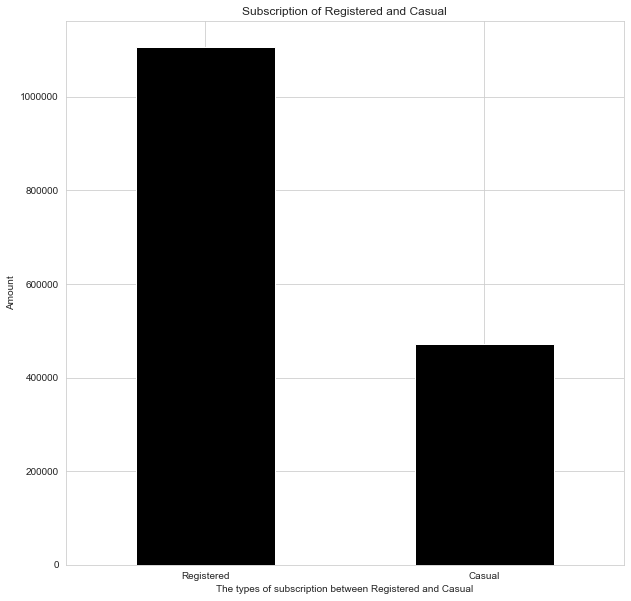

In [4]:
#Question 1
numOfSubscTypes = ht['subsc_type'].value_counts()
print(numOfSubscTypes)

annual = ht[ht['subsc_type'] == 'Registered']
casual = ht[ht['subsc_type'] == 'Casual']

a_d = annual['duration'].mean()
c_d = casual['duration'].mean()

print(c_d)
print(a_d)

plt.clf()
numOfSubscTypes.plot(kind='bar', figsize = [10,10],color = 'black')  
plt.title('Subscription of Registered and Casual')
plt.xlabel('The types of subscription between Registered and Casual')
plt.ylabel('Amount')
plt.xticks(rotation = 0)

plt.show()

In [10]:
"""
Answer/conclusion: We plotted it to get see which one is higher and it looks like registered is the highest one.
        
        """

'\nAnswer/conclusion: We plotted it to get see which one is higher and it looks like registered is the highest one.\n        \n        '

In [11]:
"""
Question 2
Start date: What are the peak Hubway hours?

  a) Analysis of data:
    In this execise it was needed to use the start_date column which contains the start date of trip with 
    date and time, in EST to analize the peak Hubway hours.
     
  b) Approach used to generate the answer:
  So, the first thing we needed to do was read the csv using pandas but this time we had to specify 
  which column we needed as the index (start_date) and then turn it into a real time. Once we did that we then 
  used dfDatetime1.index.hour to create a column with the hours from the index and then used a for loop 
  to sum all the values corresponding to the same hour and then plotted it to see the peak Hubway hours.
  

  c) Python source code:


"""

'\nQuestion 2\nStart date: What are the peak Hubway hours?\n\n  a) Analysis of data:\n    In this execise it was needed to use the start_date column which contains the start date of trip with \n    date and time, in EST to analize the peak Hubway hours.\n     \n  b) Approach used to generate the answer:\n  So, the first thing we needed to do was read the csv using pandas but this time we had to specify \n  which column we needed as the index (start_date) and then turn it into a real time. Once we did that we then \n  used dfDatetime1.index.hour to create a column with the hours from the index and then used a for loop \n  to sum all the values corresponding to the same hour and then plotted it to see the peak Hubway hours.\n  \n\n  c) Python source code:\n\n\n'

In [3]:
dfDatetime1 = pd.read_csv('hubway_trips.csv', parse_dates=True, index_col= 'start_date')

,seq_id,hubway_id,status,duration,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,hour
start_date,,,,,,,,,,,,,
2011-07-28 10:12:00,1,8,Closed,9,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,10
2011-07-28 10:21:00,2,9,Closed,220,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,10
2011-07-28 10:33:00,3,10,Closed,56,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,10
2011-07-28 10:35:00,4,11,Closed,64,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,10
2011-07-28 10:37:00,5,12,Closed,12,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,10


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 4, 5, 6, 7, 8, 9, 3]
[62413, 74369, 91815, 92826, 91745, 99831, 130762, 176240, 129882, 91460, 62231, 47600, 38063, 26827, 17826, 14344, 10488, 2201, 7189, 26780, 73784, 128053, 79240, 3056]


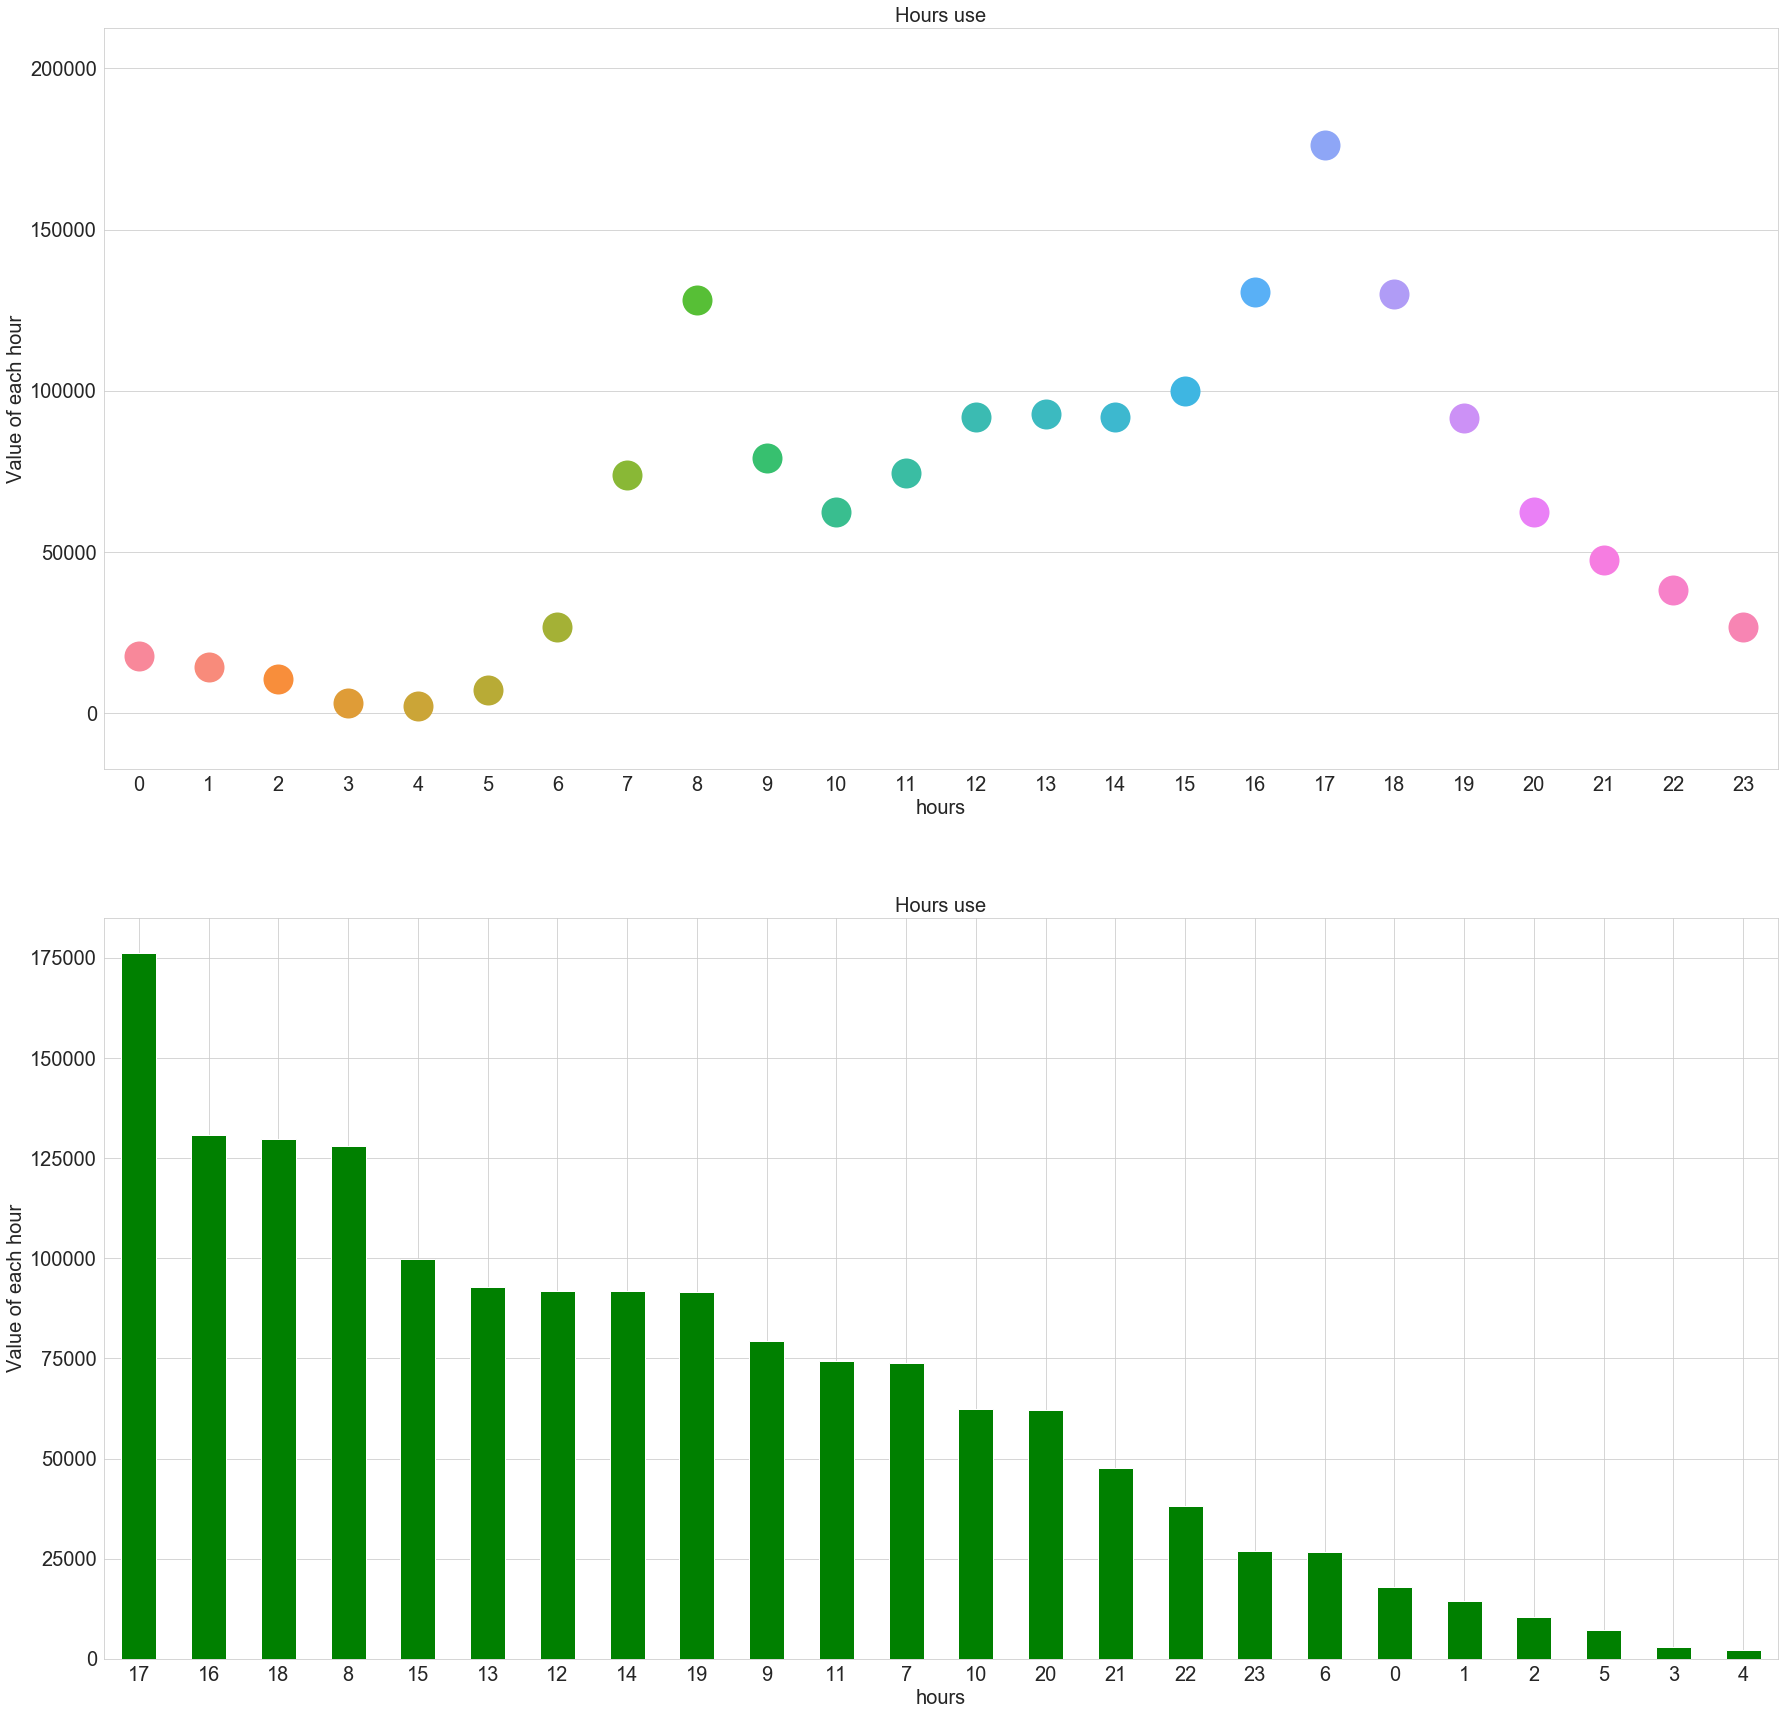

In [4]:
hourly = dfDatetime1['hour'] = dfDatetime1.index.hour
display(dfDatetime1.head())
hours = list(dict.fromkeys(hourly))
print(hours)

newListHoursValues = []
for x in hours:
    value = dfDatetime1[dfDatetime1['hour'] == x]
    value1 = value['hour'].count()
    newListHoursValues.append(value1)   

print(newListHoursValues)

hourlyValues = dfDatetime1['hour'].value_counts()

d = {'Hours':hours,'valuesHours':newListHoursValues}
dfHours = pd.DataFrame(d)

#d) Data visualization

plt.clf()
plt.subplot(2,1,1)
sns.swarmplot(x = 'Hours', y = 'valuesHours', size=30,data=dfHours)
plt.title("Hours use",fontsize = 20)
plt.xlabel("hours",fontsize = 20)
plt.ylabel("Value of each hour",fontsize = 20)
plt.xticks(fontsize = 20,rotation = 0)
plt.yticks(fontsize = 20,rotation = 0)

plt.subplot(2,1,2)
hourlyValues.plot(kind='bar', figsize = [30,30],color = 'green')
plt.title("Hours use",fontsize = 20)
plt.xlabel("hours",fontsize = 20)
plt.ylabel("Value of each hour",fontsize = 20)
plt.xticks(fontsize = 20,rotation = 0)
plt.yticks(fontsize = 20,rotation = 0)
plt.show()

In [14]:
"""

e) Answer/conclusion: We concluded that by looking at the visualization (bar plot and scatter plot) 
we were able to determine that from 15 hours to 19 hours are the highest values, with  17 hours being 
at the peak (highest one).

"""

'\n\ne) Answer/conclusion: We concluded that by looking at the visualization (bar plot and scatter plot) \nwe were able to determine that from 15 hours to 19 hours are the highest values, with  17 hours being \nat the peak (highest one).\n\n'

,seq_id,hubway_id,status,duration,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,hour
start_date,,,,,,,,,,,,,
2011-07-28 10:12:00,1,8,Closed,9,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,10
2011-07-28 10:21:00,2,9,Closed,220,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,10
2011-07-28 10:33:00,3,10,Closed,56,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,10
2011-07-28 10:35:00,4,11,Closed,64,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,10
2011-07-28 10:37:00,5,12,Closed,12,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,10


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 4, 5, 6, 7, 8, 9, 3]
[62413, 74369, 91815, 92826, 91745, 99831, 130762, 176240, 129882, 91460, 62231, 47600, 38063, 26827, 17826, 14344, 10488, 2201, 7189, 26780, 73784, 128053, 79240, 3056]


<Figure size 432x288 with 0 Axes>

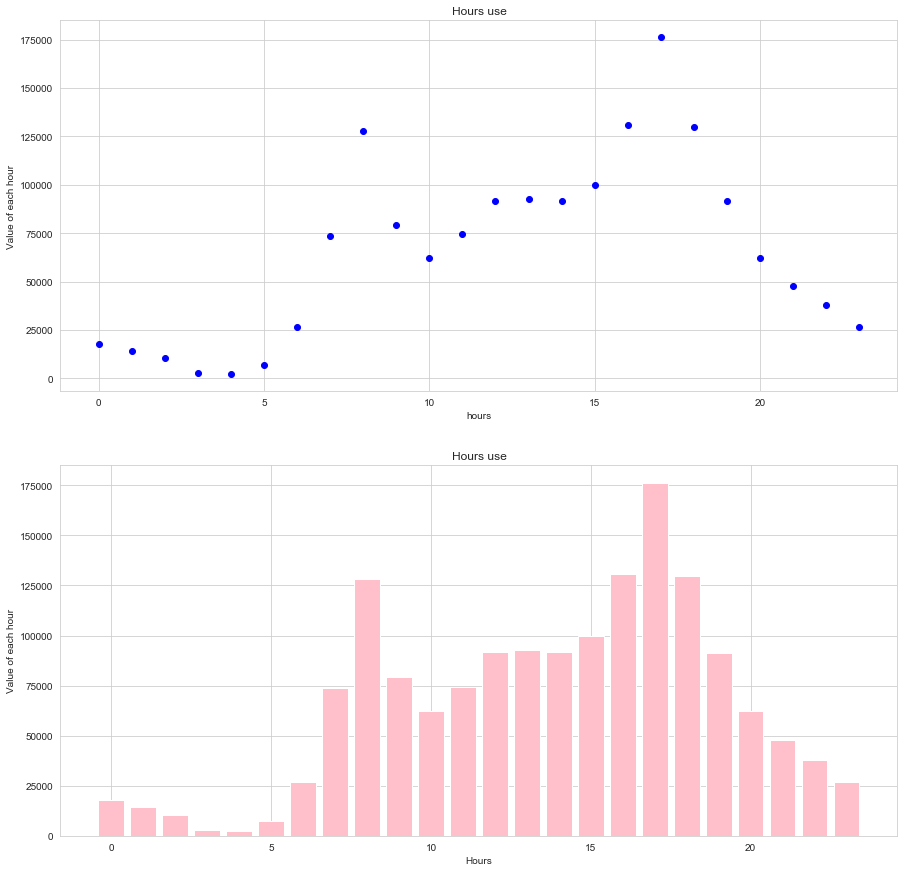

In [7]:
#Question 2 Bonus
hourly = dfDatetime1['hour'] = dfDatetime1.index.hour
display(dfDatetime1.head())
hours = list(dict.fromkeys(hourly))
print(hours)

newListHoursValues = []
for x in hours:
    value = dfDatetime1[dfDatetime1['hour'] == x]
    value1 = value['hour'].count()
    newListHoursValues.append(value1)   

print(newListHoursValues)

#d) Data visualization

plt.clf()
f, ax = plt.subplots(figsize=(15,15))

plt.subplot(2,1,1)
plt.title("Hours use")
plt.xlabel("hours")
plt.ylabel("Value of each hour")
plt.scatter(hours,newListHoursValues,color='blue')

plt.subplot(2,1,2)
plt.title("Hours use")
plt.xlabel("Hours")
plt.ylabel("Value of each hour")
plt.bar(hours,newListHoursValues,color='pink')
plt.show()

In [ ]:
"""
Question 3
End date: Which days of the week get the most Hubway traffic?

  a) Analysis of data:
    In this execise it was needed to use the end_date column which contains the end date of trip 
    with date and time, in EST to analize which days of the week get the most Hubway traffic.
     
  b) Approach used to generate the answer:
  So, the first thing we needed to do was read the csv using pandas but this time we had to specify 
  which column we needed as the index (end_date) and then turn it into a real time. Once we did that we then 
  used dfDatetimeWeek.index.weekday_name to create a column with the weeks from the index and then used 
  a Counter (which you have to import) that sums all the values corresponding to the same week day and 
  then plotted it to see the days of the week who got the most Hubway traffic.
  

  c) Python source code:


"""

'\nQuestion 3\nEnd date: Which days of the week get the most Hubway traffic?\n\n  a) Analysis of data:\n    In this execise it was needed to use the end_date column which contains the end date of trip \n    with date and time, in EST to analize which days of the week get the most Hubway traffic.\n     \n  b) Approach used to generate the answer:\n  So, the first thing we needed to do was read the csv using pandas but this time we had to specify \n  which column we needed as the index (end_date) and then turn it into a real time. Once we did that we then \n  used dfDatetimeWeek.index.weekday_name to create a column with the weeks from the index and then used \n  a Counter (which you have to import) that sums all the values corresponding to the same week day and \n  then plotted it to see the days of the week who got the most Hubway traffic.\n  \n\n  c) Python source code:\n\n\n'

In [5]:
dfDatetimeWeek = pd.read_csv('hubway_trips.csv', parse_dates=True, index_col= 'end_date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1579025 entries, 2011-07-28 10:12:00 to 2013-11-30 23:46:00
Data columns (total 12 columns):
seq_id        1579025 non-null int64
hubway_id     1579025 non-null int64
status        1579025 non-null object
duration      1579025 non-null int64
start_date    1579025 non-null object
strt_statn    1579011 non-null float64
end_statn     1578980 non-null float64
bike_nr       1578559 non-null object
subsc_type    1579025 non-null object
zip_code      1106259 non-null object
birth_date    350644 non-null float64
gender        1106414 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 156.6+ MB


None

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,Week Days
end_date,,,,,,,,,,,,,
2011-07-28 10:12:00,1,8,Closed,9,7/28/2011 10:12:00,23.0,23.0,B00468,Registered,'97217,1976.0,Male,Thursday
2011-07-28 10:25:00,2,9,Closed,220,7/28/2011 10:21:00,23.0,23.0,B00554,Registered,'02215,1966.0,Male,Thursday
2011-07-28 10:34:00,3,10,Closed,56,7/28/2011 10:33:00,23.0,23.0,B00456,Registered,'02108,1943.0,Male,Thursday
2011-07-28 10:36:00,4,11,Closed,64,7/28/2011 10:35:00,23.0,23.0,B00554,Registered,'02116,1981.0,Female,Thursday
2011-07-28 10:37:00,5,12,Closed,12,7/28/2011 10:37:00,23.0,23.0,B00554,Registered,'97214,1983.0,Female,Thursday


['Thursday', 'Friday', 'Saturday', 'Monday', 'Sunday', 'Wednesday', 'Tuesday']
Counter({'Wednesday': 238615, 'Thursday': 234869, 'Tuesday': 231785, 'Friday': 230906, 'Monday': 230549, 'Saturday': 215591, 'Sunday': 196710})
[234869, 230906, 215591, 230549, 196710, 238615, 231785]


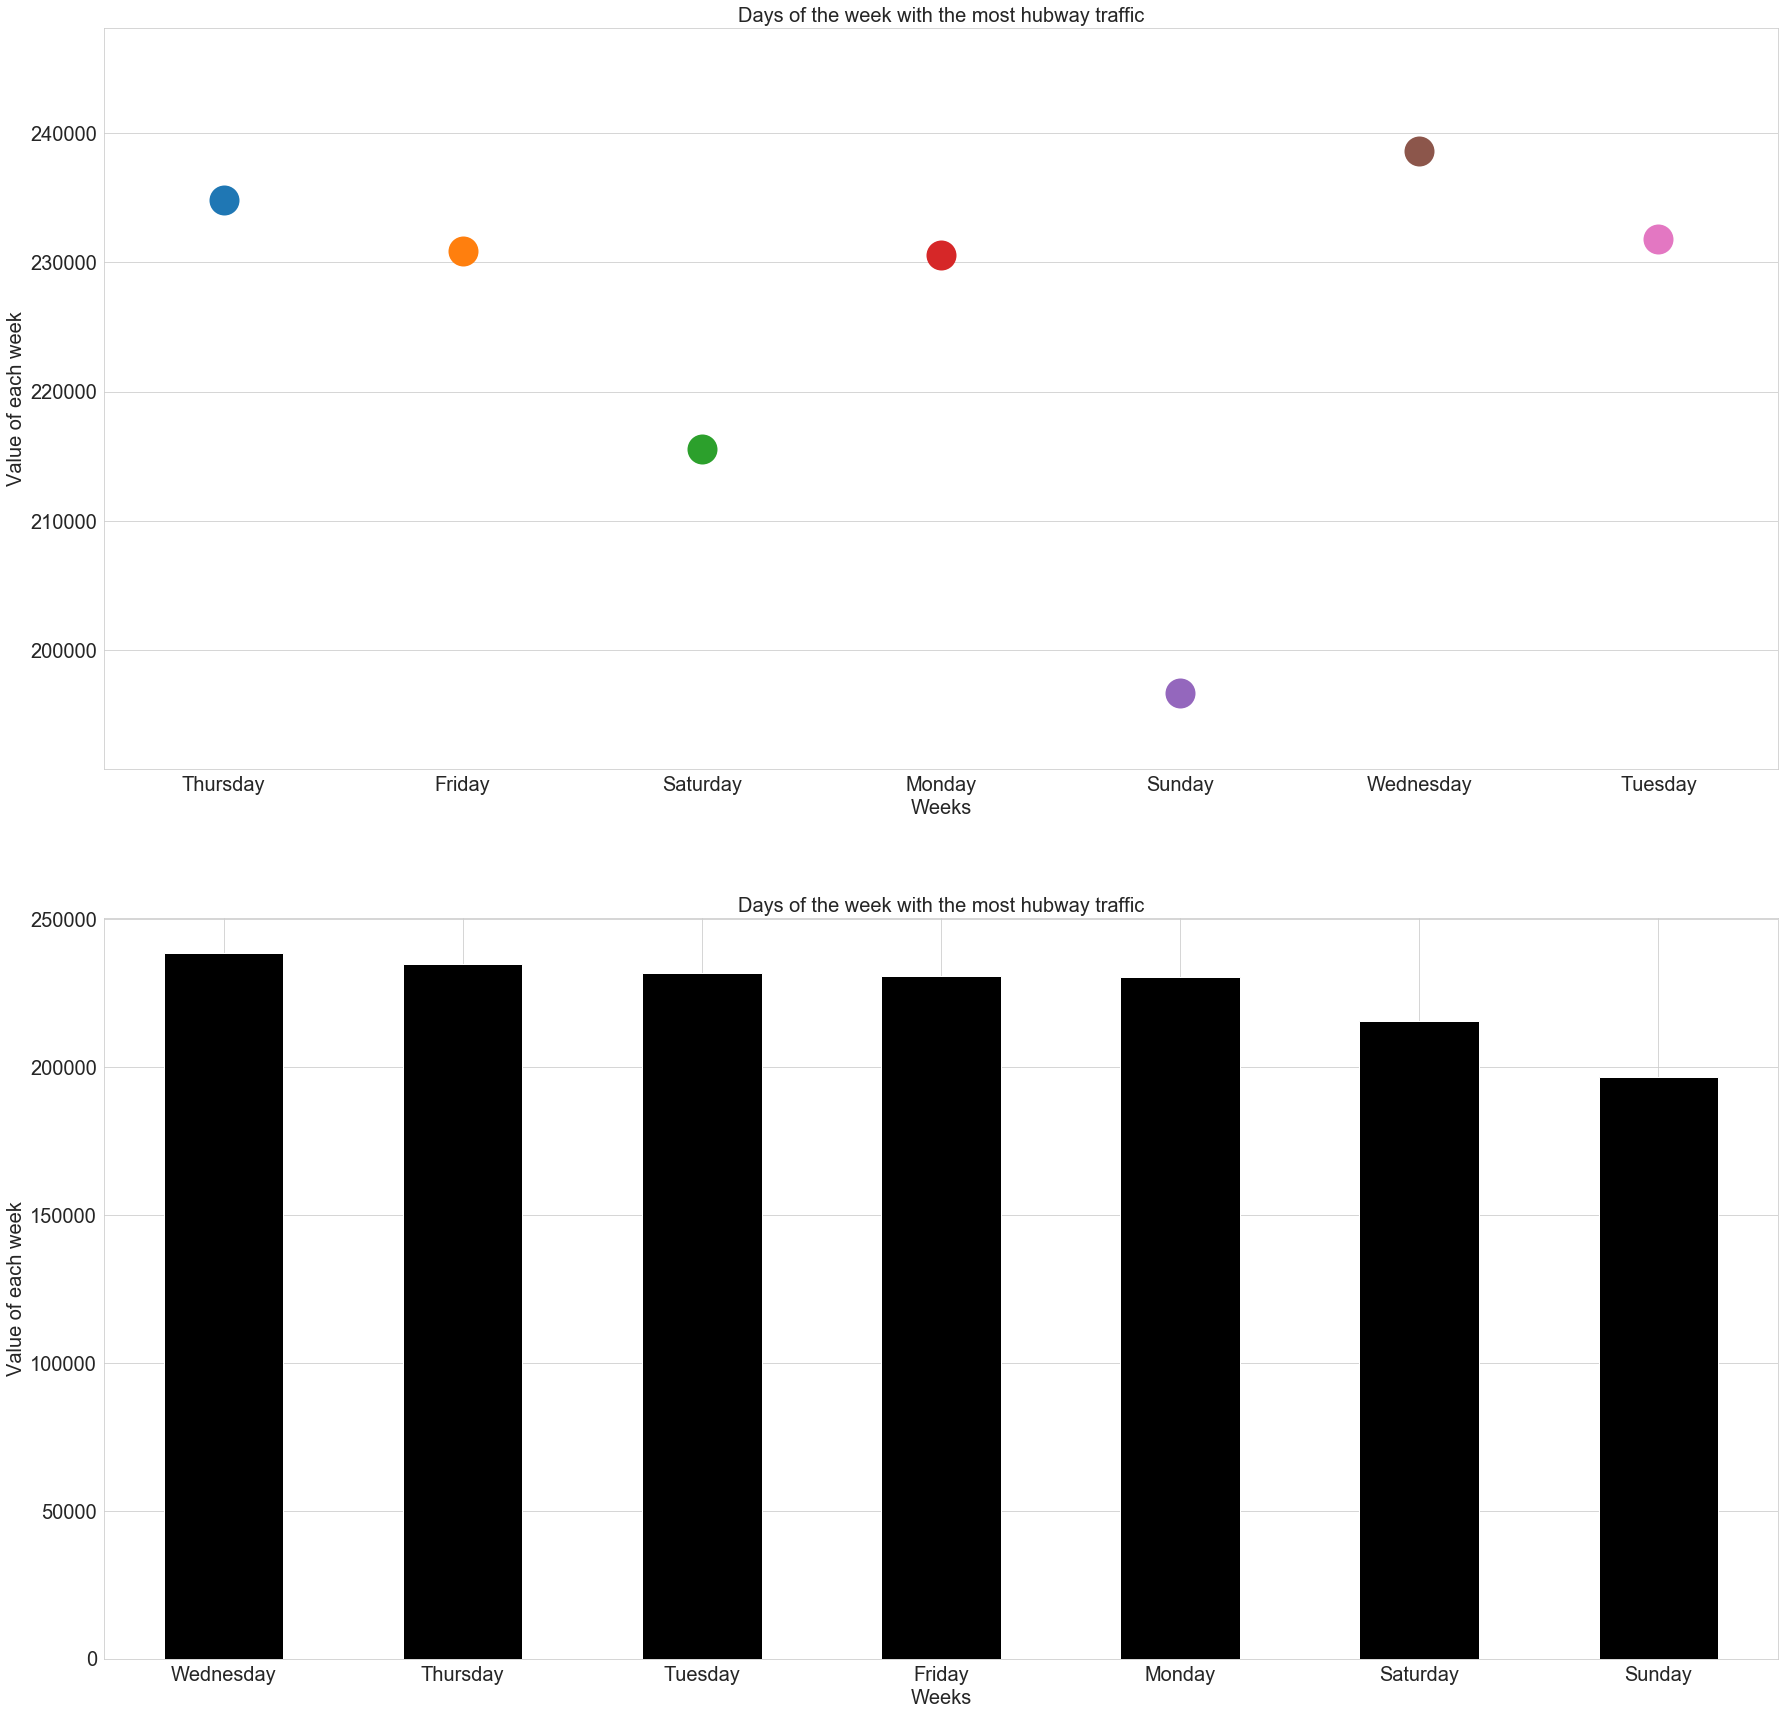

In [8]:
display(dfDatetimeWeek.info())

weekNames = dfDatetimeWeek['Week Days'] = dfDatetimeWeek.index.weekday_name
display(dfDatetimeWeek.head())

weekList = list(dict.fromkeys(weekNames))
print(weekList)

weekDic = c.Counter(weekNames)
print(weekDic)

weekValues = list(weekDic.values())
print(weekValues)
 
weeklyValues = dfDatetimeWeek['Week Days'].value_counts()

d = {'WeekDays':weekList,'valuesweeks':weekValues}
dfHours = pd.DataFrame(d)


#d) Data visualization
plt.clf()
plt.subplot(2,1,1)
sns.swarmplot(x = 'WeekDays', y = 'valuesweeks', size=30,data=dfHours)
plt.title("Days of the week with the most hubway traffic",fontsize = 20)
plt.xlabel("Weeks",fontsize = 20)
plt.ylabel("Value of each week",fontsize = 20)
plt.xticks(fontsize = 20,rotation = 0)
plt.yticks(fontsize = 20,rotation = 0)

plt.subplot(2,1,2)
weeklyValues.plot(kind='bar', figsize = [30,30],color = 'black')
plt.title("Days of the week with the most hubway traffic",fontsize = 20)
plt.xlabel("Weeks",fontsize = 20)
plt.ylabel("Value of each week",fontsize = 20)
plt.xticks(fontsize = 20,rotation = 0)
plt.yticks(fontsize = 20,rotation = 0)
plt.show()

In [33]:
"""

e) Answer/conclusion: We concluded that by looking at the visualization (bar plot and scatter plot) 
we were able to determine that in the weekdays is where the most Hubway traffic is. Also worth noting that 
Wednesday get the most Hubway traffic.

"""

'\n\ne) Answer/conclusion: We concluded that by looking at the visualization (bar plot and scatter plot) \nwe were able to determine that in the weekdays is where the most Hubway traffic is. Also worth noting that \nWednesday get the most Hubway traffic.\n\n'

In [32]:
"""
Question 4
Start station: Which stations are most popular? Which stations make up the most popular origin/destination pairs?

  a) Analysis of data: In this exercise, we will need the columns strt_statn and end_statn 
  so that we can check them and see the top 5 stations that are the most popular by checking which stations 
  are repeated the most. Not only that but we will do the same to get the pairs of the most popular origin/destination.
  
 
     
  b) Approach used to generate the answer: So we used the strt_statn and end_statn columns 
  and concatenate them and then check the frequency of each station to see top 5 stations that are the most popular. 
  We did the same thing with to get the pairs of the most popular origin/destination but created a column called  
  Origin/Destinations pairs and used .map(str) to get the pairs of strt_statn and end_statn columns.
 
  

  c) Python source code: 


"""

'\nQuestion 4\nStart station: Which stations are most popular? Which stations make up the most popular origin/destination pairs?\n\n  a) Analysis of data: In this exercise, we will need the columns strt_statn and end_statn \n  so that we can check them and see the top 5 stations that are the most popular by checking which stations \n  are repeated the most. Not only that but we will do the same to get the pairs of the most popular origin/destination.\n  \n \n     \n  b) Approach used to generate the answer: So we used the strt_statn and end_statn columns \n  and concatenate them and then check the frequency of each station to see top 5 stations that are the most popular. \n  We did the same thing with to get the pairs of the most popular origin/destination but created a column called  \n  Origin/Destinations pairs and used .map(str) to get the pairs of strt_statn and end_statn columns.\n \n  \n\n  c) Python source code: \n\n\n'

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


,0
22.0,112723
36.0,85958
53.0,68809
67.0,68265
42.0,67714


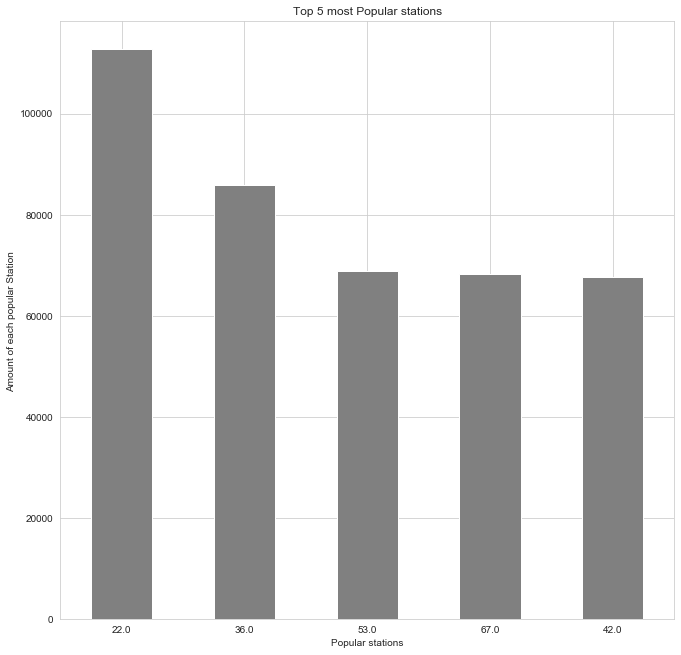

 id                            station
 22  South Station - 700 Atlantic Ave. 

 id                                   station
 36  Boston Public Library - 700 Boylston St. 

 id               station
 53  Beacon St / Mass Ave 

 id                       station
 67  MIT at Mass Ave / Amherst St 

 id                        station
 42  Boylston St. at Arlington St. 



In [11]:
#Exercise 4 1.1
display(ht.head())

hubwayExtract1 = ht['strt_statn'] 
hubwayExtract2 = ht['end_statn'] 

hubwayUnited = pd.concat([hubwayExtract1, hubwayExtract2]).value_counts()
hubwayPd = pd.DataFrame(hubwayUnited)
display(hubwayPd.head())
hubwayCondition = hubwayPd[hubwayPd[0] > 65000]

#d) Data visualization
hubwayCondition.plot(kind='bar', figsize = [11,11],color = "grey",legend=False)
plt.title('Top 5 most Popular stations')
plt.xlabel('Popular stations')
plt.ylabel('Amount of each popular Station ')
plt.xticks(rotation = 0)
plt.show()

searchId = hs[hs['id'] == 22]
print(searchId[['id','station']].to_string(index=False),'\n')
searchId = hs[hs['id'] == 36]
print(searchId[['id','station']].to_string(index=False),'\n')
searchId = hs[hs['id'] == 53]
print(searchId[['id','station']].to_string(index=False),'\n')
searchId = hs[hs['id'] == 67]
print(searchId[['id','station']].to_string(index=False),'\n')
searchId = hs[hs['id'] == 42]
print(searchId[['id','station']].to_string(index=False),'\n')

In [12]:
#Exercise 4 1.2
stationsExtract = ht[['strt_statn','end_statn']]
stationsExtract['Origin/Destinations pairs'] = stationsExtract['strt_statn'].map(str) +'/'+ stationsExtract['end_statn'].map(str)
display(stationsExtract.head())

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,strt_statn,end_statn,Origin/Destinations pairs
0,23.0,23.0,23.0/23.0
1,23.0,23.0,23.0/23.0
2,23.0,23.0,23.0/23.0
3,23.0,23.0,23.0/23.0
4,23.0,23.0,23.0/23.0


,Origin/Destinations pairs
53.0/67.0,5185
67.0/53.0,4993
40.0/22.0,4384
22.0/40.0,4208
58.0/58.0,3126


<Figure size 432x288 with 0 Axes>

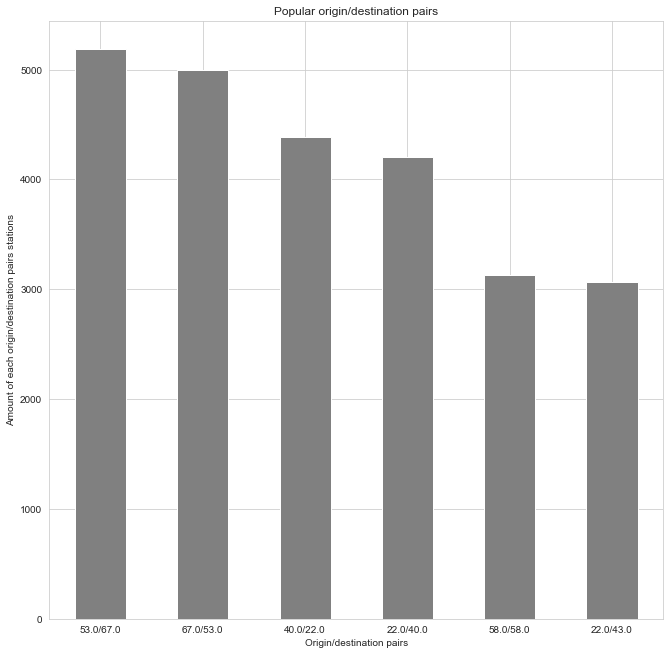

 id               station
 53  Beacon St / Mass Ave 

 id                       station
 67  MIT at Mass Ave / Amherst St 

 id                      station
 40  Lewis Wharf - Atlantic Ave. 

 id                            station
 22  South Station - 700 Atlantic Ave. 

 id                                      station
 58  The Esplanade - Beacon St. at Arlington St. 

 id                     station
 43  Rowes Wharf - Atlantic Ave 



In [13]:
trueValueStation = stationsExtract['Origin/Destinations pairs'].value_counts()
trueValueStationPd = pd.DataFrame(trueValueStation)
display(trueValueStationPd.head())
stationCondition = trueValueStationPd[trueValueStationPd['Origin/Destinations pairs'] > 3000]

#d) Data visualization
plt.clf()
stationCondition.plot(kind='bar', figsize = [11,11],color = "grey",legend=False)
plt.title('Popular origin/destination pairs')
plt.xlabel('Origin/destination pairs')
plt.ylabel('Amount of each origin/destination pairs stations')
plt.xticks(rotation = 0)
plt.show()

searchId = hs[hs['id'] == 53]
print(searchId[['id','station']].to_string(index=False),'\n')
searchId = hs[hs['id'] == 67]
print(searchId[['id','station']].to_string(index=False),'\n')
searchId = hs[hs['id'] == 40]
print(searchId[['id','station']].to_string(index=False),'\n')
searchId = hs[hs['id'] == 22]
print(searchId[['id','station']].to_string(index=False),'\n')
searchId = hs[hs['id'] == 58]
print(searchId[['id','station']].to_string(index=False),'\n')
searchId = hs[hs['id'] == 43]
print(searchId[['id','station']].to_string(index=False),'\n')

In [ ]:
"""

e) Answer/conclusion: We concluded that by looking at the visualization we were able to know the top 5 
most popular stations which is: South Station - 700 Atlantic Ave., Boston Public Library - 700 Boylston St.,
Beacon St / Mass Ave, MIT at Mass Ave / Amherst St, and Boylston St. at Arlington St. We also were able to find the  
most popular origin/destination pairs which the top one is 53/67.
"""

In [ ]:
"""Question 5 End station
        a) In this excercise we will create a frequency count to see which 
            stations tend to be more assymetric with the ocurrences of the stations.
            
        b) Approach used to generate the answer: We used a lot of value_counts() to extract the data we need and 
        turned it back into a dataframe to plot it. 
 
  

        c) Python source code: 
        
        
        
        
        """

In [14]:
#Exercise 5

#counting the occurenes
strtS= ht['strt_statn'].value_counts()
endS = ht['end_statn'].value_counts()

#creating the dataframes
S_stations = pd.DataFrame(strtS)
E_stations = pd.DataFrame(endS)

#creating series to use as an index
Sst= ht['strt_statn'].value_counts()>30000
Est= ht['end_statn'].value_counts()>30000

series_S = S_stations[Sst]
series_E = E_stations[Est]

print(series_S)
print(series_E)

      strt_statn
22.0       56443
36.0       42571
53.0       35440
67.0       33685
16.0       32860
42.0       32798
33.0       31077
      end_statn
22.0      56280
36.0      43387
42.0      34916
67.0      34580
53.0      33369
33.0      32246


<Figure size 1800x720 with 0 Axes>

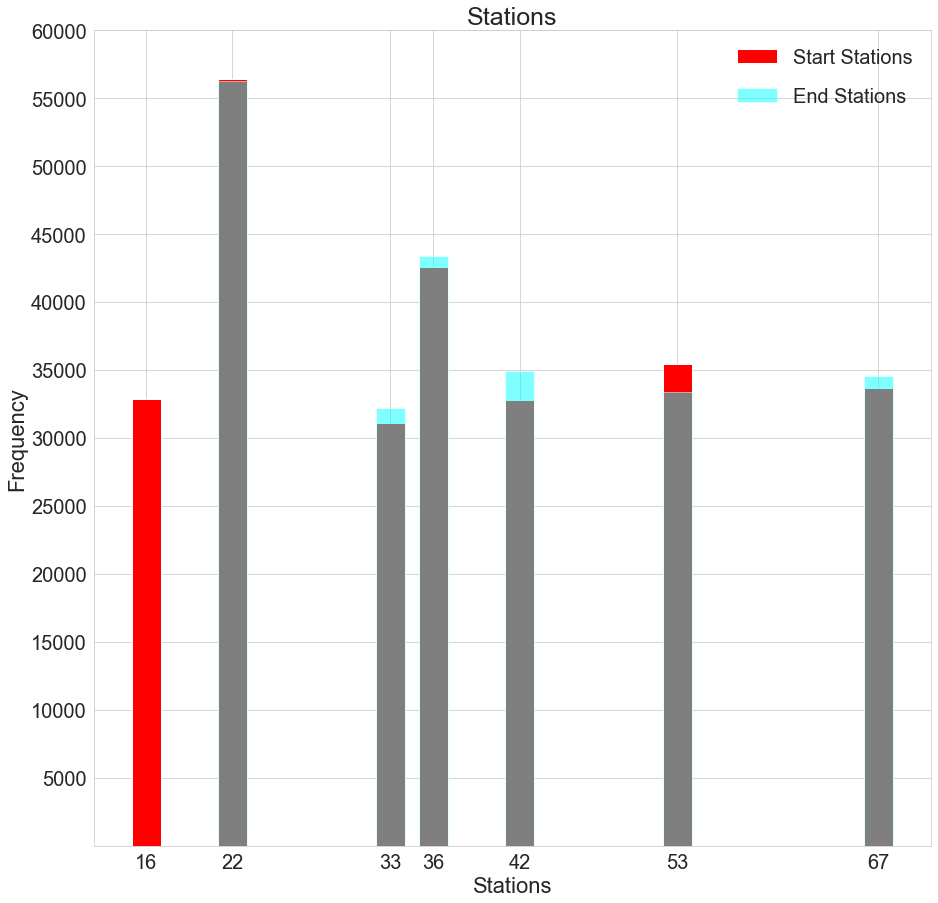

In [31]:
## Visualization 

xs=[22.0, 36.0, 53.0, 67.0, 16.0, 42.0, 33.0]
xe=[22.0, 36.0, 42.0, 67.0, 53.0, 33.0]

ys=series_S['strt_statn']
ye=series_E['end_statn']

#legend
Stations=['Start Stations', 'End Stations']
tks=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000]

plt.clf()
f, ax = plt.subplots(figsize=(15,15))

plt.bar(xs,ys, color= 'r',width=2)
plt.bar(xe,ye, alpha=0.5, color = 'cyan', width = 2)
plt.xticks(xs)
plt.yticks(tks)
plt.legend(Stations, shadow = True, fancybox = True, frameon = False, labelspacing=1,fontsize = 20)
plt.rcParams['figure.figsize']=(25,10)
plt.title('Stations',fontsize=25)
plt.xlabel('Stations', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
""" In this vizualization we can see which of the staions have the most 
    trips started and ended in them and therefore we can figure which is
    the most assymetric station."""

In [16]:
# getting the five most popular stations
#station 1
st1 =hs[hs['id']==16]

print(st1[['id','station']].to_string(index=False))

#station 2
st2 =hs[hs['id']==22]
print(st2[['id','station']].to_string(index=False))

#station 3
st3 =hs[hs['id']==33]
print(st3[['id','station']].to_string(index=False))

#station 4
st4 =hs[hs['id']==36]
print(st4[['id','station']].to_string(index=False))

#station 5
st5=hs[hs['id']==42]
print(st5[['id','station']].to_string(index=False))

 id                       station
 16  Back Bay / South End Station
 id                            station
 22  South Station - 700 Atlantic Ave.
 id                station
 33  Kenmore Sq / Comm Ave
 id                                   station
 36  Boston Public Library - 700 Boylston St.
 id                        station
 42  Boylston St. at Arlington St.


In [ ]:
"""e)answer/conclusion:
        After seing our graph and obtaing the names of our most
        relevant staions we can observe that the most assymetric
        is the Black bay/ south end station since many trips start
        at the station, however; almost no trips end there , even if
        in the info of the map it does not appear as a hill. In the
        other way we can see that the most symetric station is the atlantic
        ave. stations since it almost has the same start of trips and ends."""

In [ ]:
"""
Question 6
Bike Nr: What does a year in the life of one Hubway bike look like?

  a) Analysis of data: In this question we need to use the bike_nr to find the year of one Hubway bike.
  
 
     
  b) Approach used to generate the answer: We used ht['bike_nr'].value_counts() to get all the values of each bike 
  that was used and also got the mean of that. We needed to use a lot of conditions to filter the data we needed. 
 
  

  c) Python source code: 


"""

B00490    2138
B00268    2124
B00548    2112
B00559    2091
B00563    2080
Name: bike_nr, dtype: int64
1357.3164230438522


,bike_nr
B00548,2112


False    1576913
True        2112
Name: bike_nr, dtype: int64
2358206
Registered    1378
Casual         734
Name: subsc_type, dtype: int64


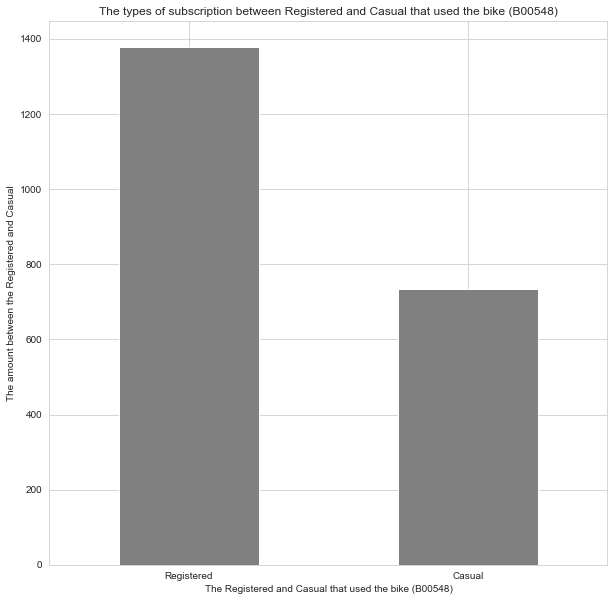

In [17]:
allBikesTotal = ht['bike_nr'].value_counts()
print(allBikesTotal.head())

bikesMean = allBikesTotal.mean()
print(bikesMean)

bikePD = pd.DataFrame(allBikesTotal)
bikeSearch = bikePD[bikePD['bike_nr'] == 2112]
display(bikeSearch)

bikePDCondition = ht['bike_nr'] == 'B00548'
bikeSum= bikePDCondition.value_counts()
print(bikeSum)

durationBike = ht[ht['bike_nr'] == 'B00548']
durationBikeSum =durationBike['duration'].sum()
print(durationBikeSum)

BikeSub = ht[ht['bike_nr'] == 'B00548']
sumBikeSub = BikeSub['subsc_type'].value_counts()
print(sumBikeSub)

sumBikeSub.plot(kind='bar', figsize = [10,10],color = "grey")
plt.title('The types of subscription between Registered and Casual that used the bike (B00548)')
plt.xlabel('The Registered and Casual that used the bike (B00548)')
plt.ylabel('The amount between the Registered and Casual')
plt.xticks(rotation = 0)

plt.show()

In [ ]:
"""Answer/conclusion:
        While looking at the graph of the data we can see that the use of the 
        bikes is mostly by registered user since they are more than double 
        the cuantity of the casual members, however; that does not mean that
        the casual members are a low since they also have 472,611 user, but
        in comparison to the  1,106,414 of the registered they are way less."""

Male      1022
Female     356
Name: gender, dtype: int64


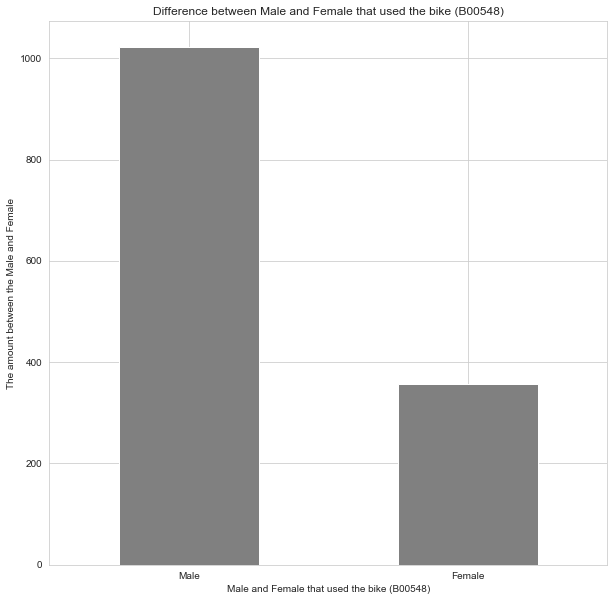

In [18]:
#Question 6 Bonus
BikeGender = ht[ht['bike_nr'] == 'B00548']
sumBikeGender= BikeGender['gender'].value_counts()
print(sumBikeGender)

sumBikeGender.plot(kind='bar', figsize = [10,10],color = "grey")
plt.title('Difference between Male and Female that used the bike (B00548)')
plt.xlabel('Male and Female that used the bike (B00548)')
plt.ylabel('The amount between the Male and Female')
plt.xticks(rotation = 0)

plt.show()

In [ ]:
"""
Question 7
Member Type: Which stations get the most tourist traffic, and which get the most commuters?

  a) Analysis of data: In this question we need the subsc_type, strt_statn and end_statn to find the data.
  
 
     
  b) Approach used to generate the answer: We started using a lot of conditions to extract the value and used value_counts()
  to get the total data seperately.
 
  

  c) Python source code: 


"""

## Question 7 : member type. Which stations get the most tourist traffic, and which get the most commuters?

In [19]:
#Create Series that hold the values in the column 'subsc_type' that equals 'Registered' and 'Casual'
register=ht['subsc_type']=='Registered'
casual=ht['subsc_type']== 'Casual'

#Use the Series created above to use as reference
df_r=ht[register]
df_c=ht[casual]

#Create variable that holds the start stations of Registered and Casuals customers
reg_s=df_r['strt_statn']
cas_s=df_c['strt_statn']

#Create variable that holds the end stations of Registered and Casuals customers
reg_e=df_r['end_statn']
cas_e=df_r['end_statn']

#Combine the start and end stations series into one series
s_reg=reg_s.append(reg_e).value_counts()
s_cas=cas_s.append(cas_e).value_counts()
#creating the dataframes
Dfc = pd.DataFrame(s_cas)
Dfr =pd.DataFrame(s_reg)

#casuals with 35k or more and registered with 30k or more
cas = cas_s.append(cas_e).value_counts()>30000
reg = reg_s.append(reg_e).value_counts()>35000

#Filtering the datafrfames by index
icas= Dfc[cas]
ireg= Dfr[reg]

print(icas)
print(ireg)


          0
22.0  56669
36.0  43880
67.0  34345
42.0  34121
53.0  32726
33.0  31911
16.0  30151
          0
22.0  92538
16.0  51471
36.0  51353
67.0  49208
53.0  45652
43.0  40765
33.0  40762
48.0  39793
40.0  36410
39.0  35997
21.0  35940
42.0  35541


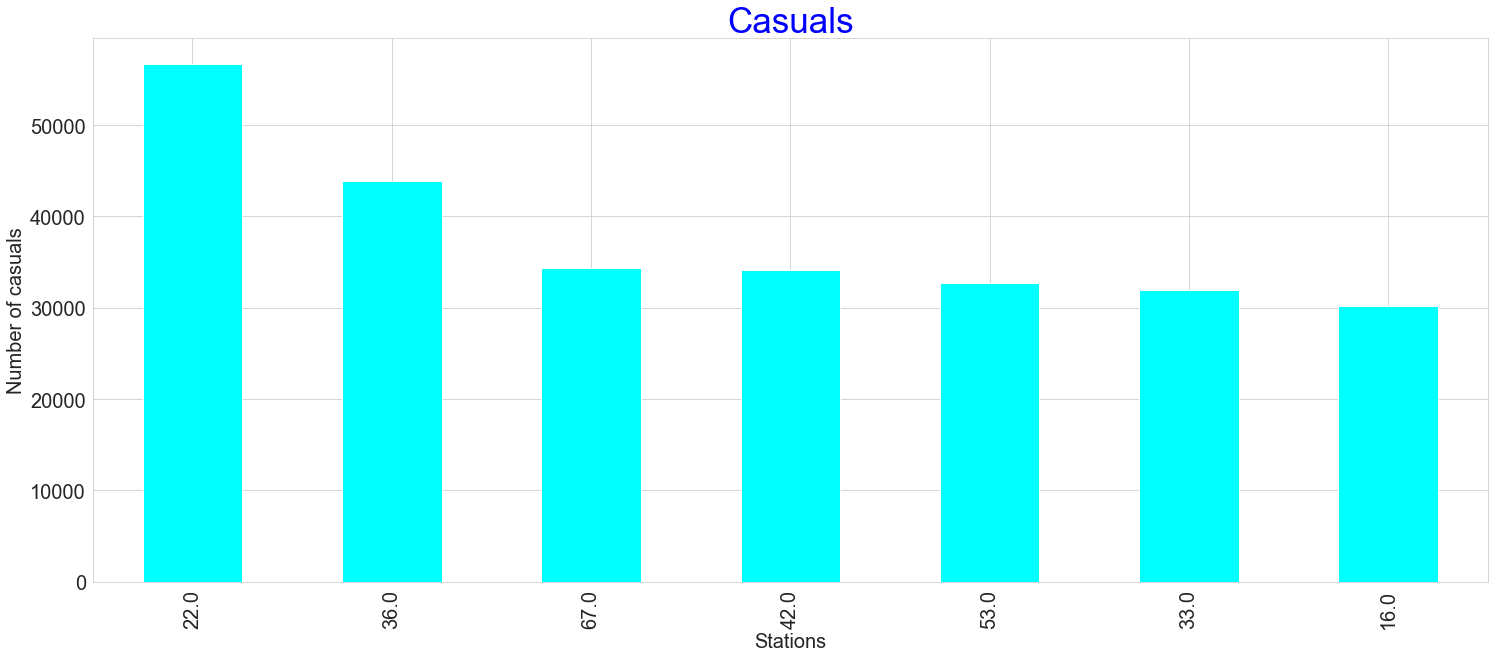

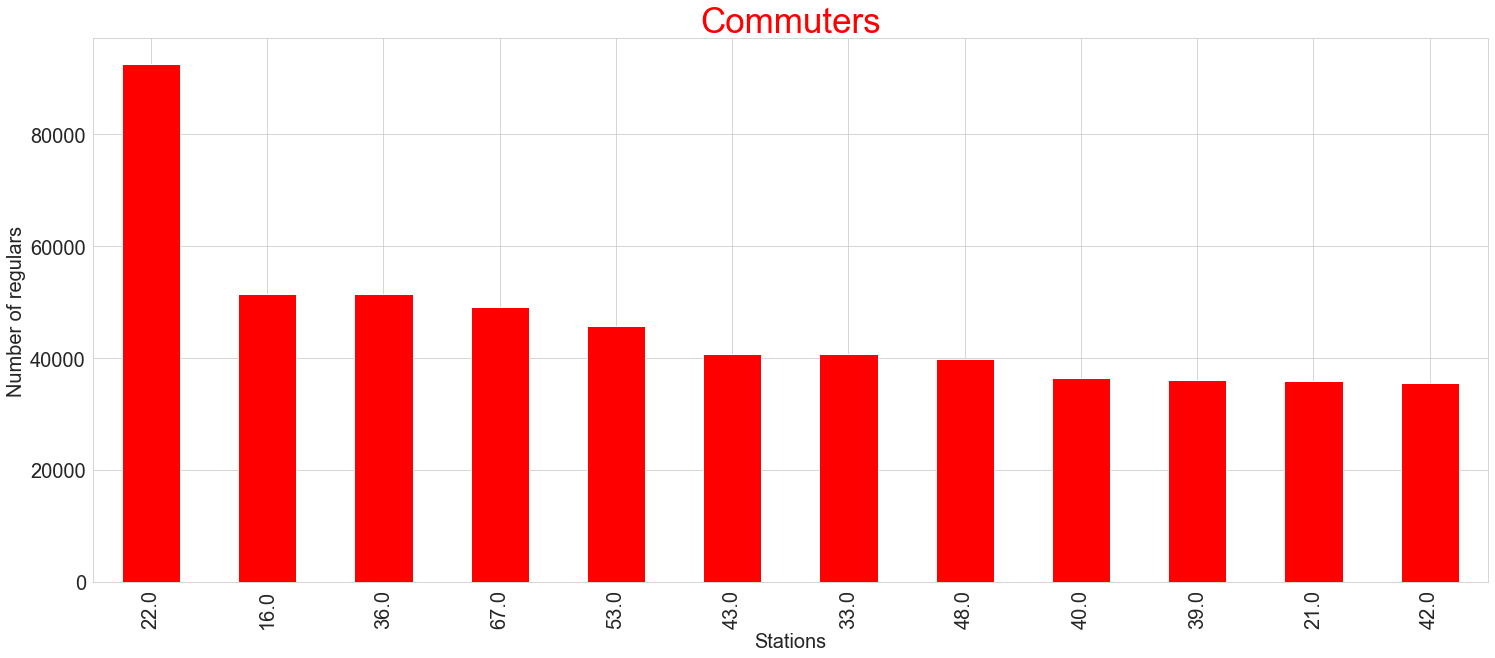

In [20]:
# Data Visualization: creating bar plots for each type

icas.plot.bar(figsize=[25,10] , color="cyan", legend=None)
plt.title('Casuals', fontsize= 35, color='b')
plt.xlabel("Stations",fontsize= 20)
plt.ylabel('Number of casuals',fontsize= 20)
plt.yticks(fontsize= 20)
plt.xticks(fontsize= 20)
plt.show()

ireg.plot.bar(figsize=[25,10], color="r", legend=None)
plt.title('Commuters', fontsize= 35, color='r')
plt.xlabel("Stations",fontsize= 20)
plt.ylabel('Number of regulars',fontsize= 20)
plt.yticks(fontsize= 20)
plt.xticks(fontsize= 20)
plt.show()


In [ ]:
'''e) Answer/conclusion:
        After looking at our graphs and data we can obtain which is the
        most used staion for the casual members and also for the annual
        member. The annual members have the station 22 as their most used
        staion and that staions is the South staion - 700 Atlantic ave., 
        followed by the station 16 which is the Black Bay / south end station,
        And for the casual members the most used station is the 22 
        South staion - 700 Atlantic ave., however; their second most used station
        is the 36: Boston Public Library - 700 Boylston St. '''

In [ ]:
"""
Question 8
Zip code: How far does Hubway really reach? Which community should be the next to get Hubway stations?

  a) Analysis of data: In this exercise in the first question we concentrated on the lat and lng columns
  to find how far the hubway can reach. We also are going to need the zip_code column so that we can 
  check which community should be the next to get Hubway stations by checking which are repeated the most 
  and then using 95% quantile.
     
 
     
  b) Approach used to generate the answer: So in the first exercise we used the lat and lng columns seperately
  so that we can easily plot the map by placing the longitud and the latitude in the for loop. 
  In the second exercise the used the zip_code column with the value_counts() to count the repeated zip codes which we 
  then used the .quantile(.95) to check all the data that's in the 95% since it means that 95 % 
  of the sample is below its value and 5 % is above which we then used the > condition to get all the data that's bigger 
  than the 95% quantile and then plotted the bar plot.
 
  

  c) Python source code: 


"""

In [5]:
#Exercise 8.1
latlng = hs[['lat','lng']]
#zipp = ht[['zip_code']]
display(latlng.head())


m= folium.Map()
 
for i in range(0,len(latlng)):
    folium.Marker([latlng.iloc[i]['lat'], latlng.iloc[i]['lng']]).add_to(m)
    #folium.Marker([latlng.iloc[i]['lat'], latlng.iloc[i]['lng']],popup=zipp.iloc[i]['zip_code']).add_to(m)

m.fit_bounds(m.get_bounds())
m

,lat,lng
0,42.340021,-71.100812
1,42.345392,-71.069616
2,42.341814,-71.090179
3,42.361285,-71.065140
4,42.353412,-71.044624


,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


zip_code    8357.65
Name: 0.95, dtype: float64


,zip_code
'02118,121749.0
'02139,89437.0
'02215,86758.0
'02116,77279.0
'02115,57522.0


<Figure size 1800x720 with 0 Axes>

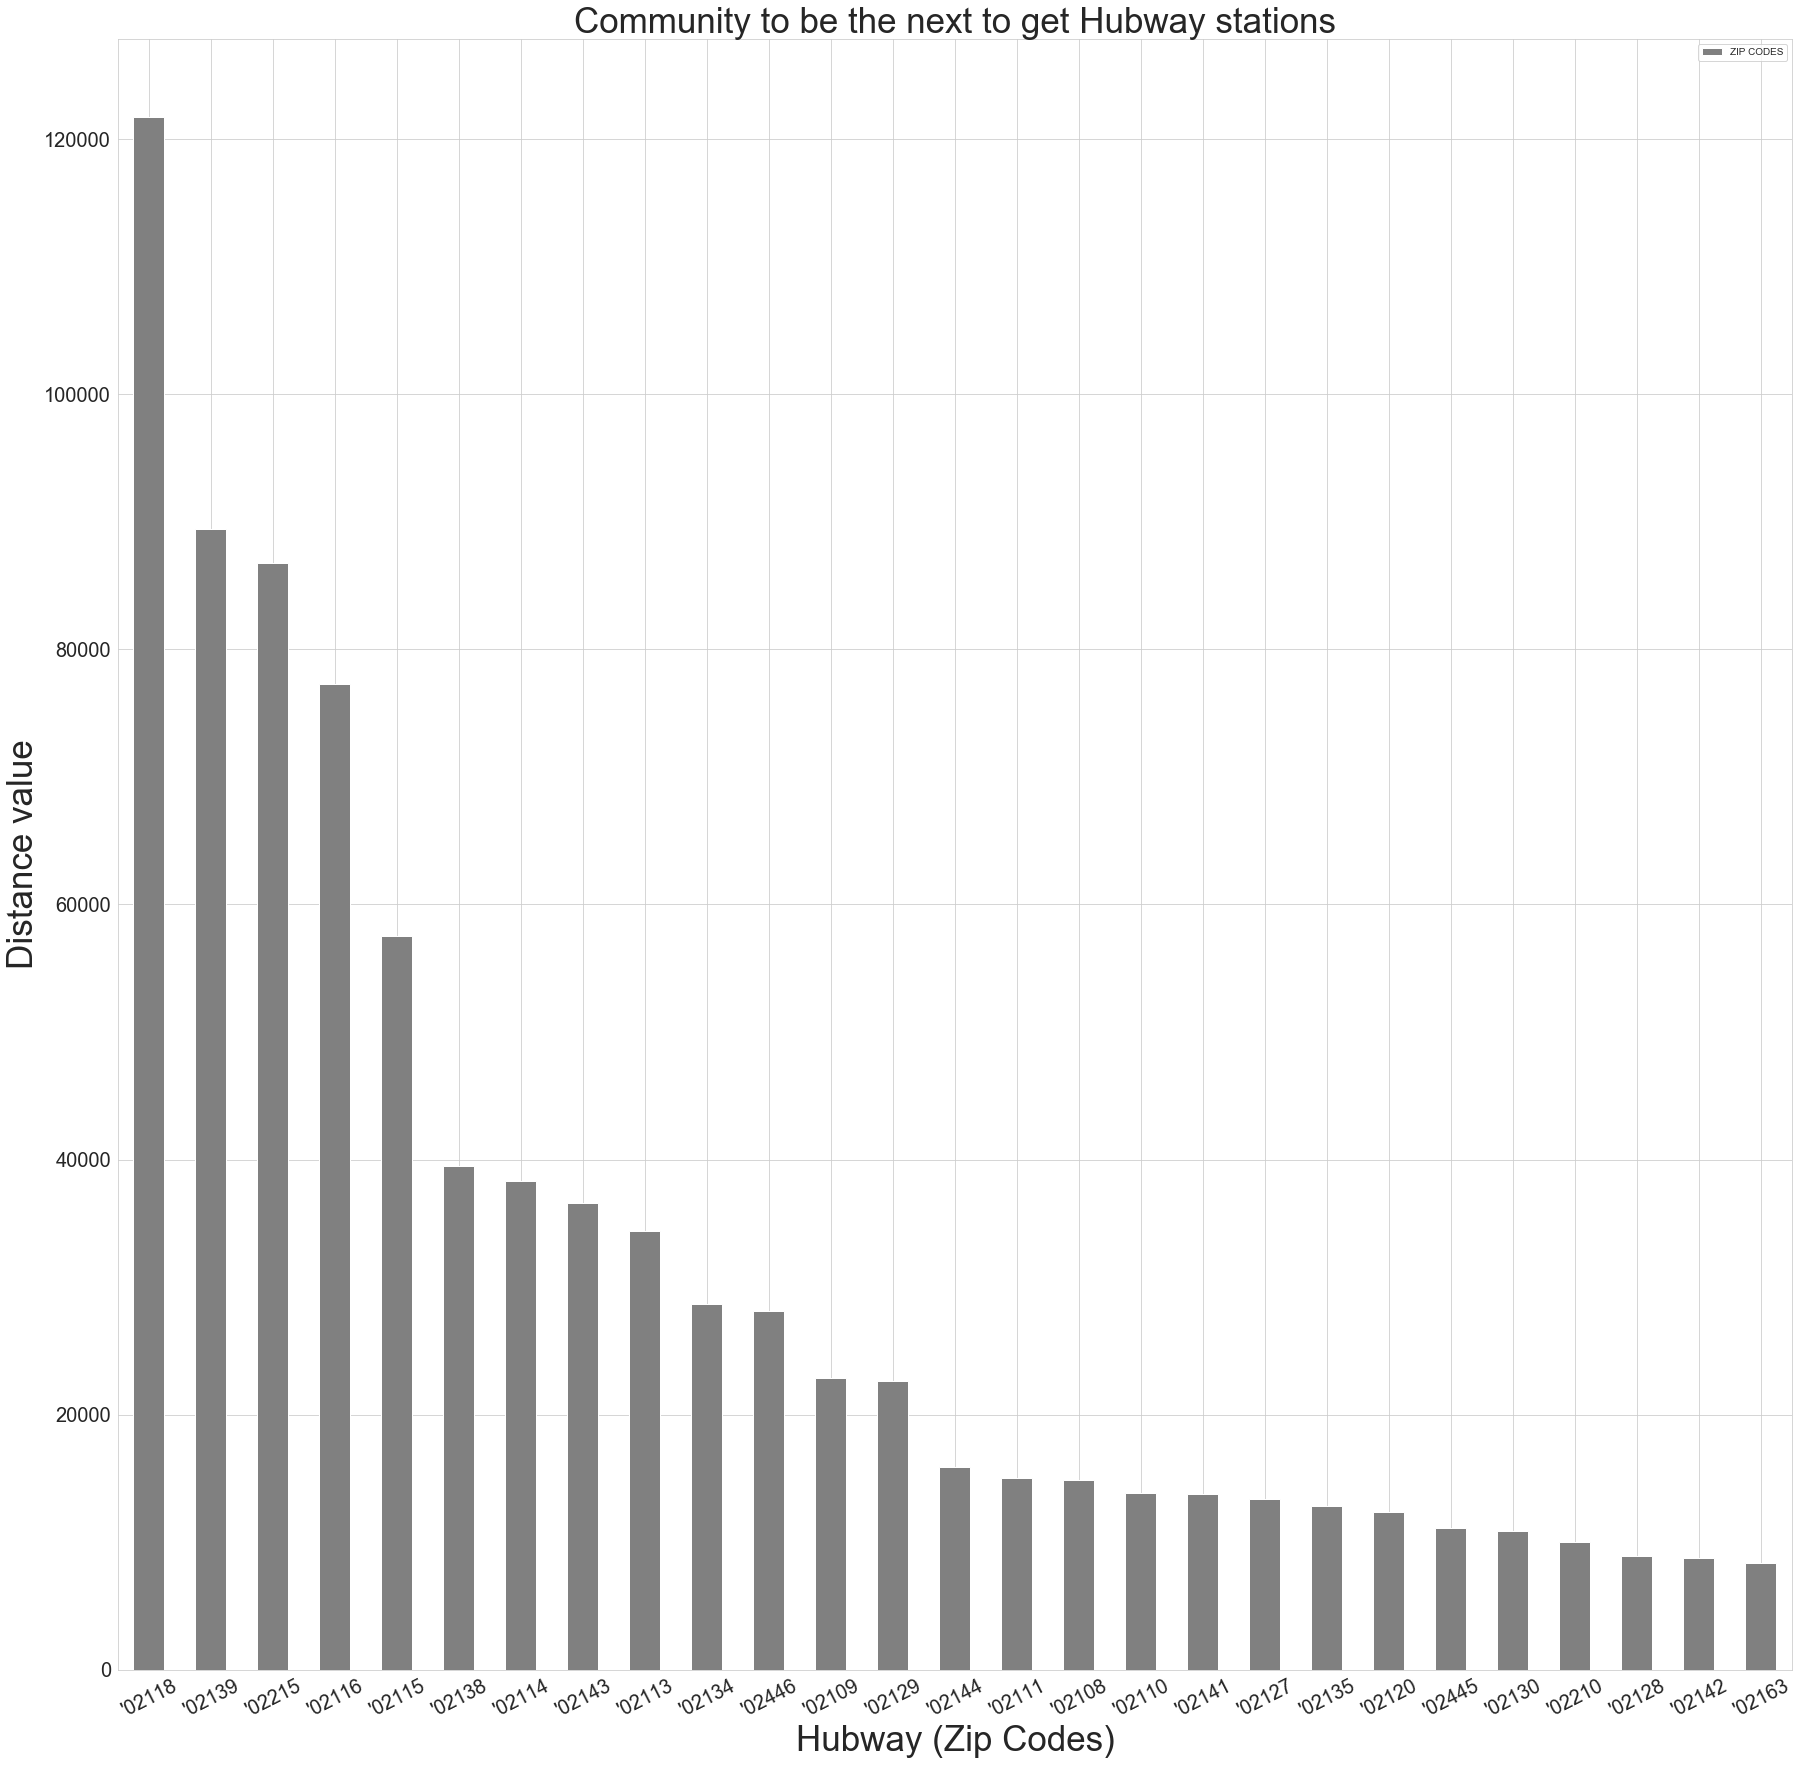

In [22]:
#Exercise 8.2
display(ht.head())

zipSeries = ht['zip_code'].value_counts()
zipSeriesPD = pd.DataFrame(zipSeries)
print(zipSeriesPD.quantile(.95))
zipCondition = zipSeriesPD[zipSeriesPD > zipSeriesPD.quantile(.95)]
zipDropNA = zipCondition.dropna()
display(zipDropNA.head())

#d) Data visualization
plt.clf()
zipDropNA.plot(kind='bar', figsize = [30,30],color = "grey")
plt.title('Community to be the next to get Hubway stations',fontsize = 35)
plt.xlabel('Hubway (Zip Codes)',fontsize = 35)
plt.ylabel('Distance value',fontsize = 35)
plt.xticks(rotation = 27)
plt.xticks(size = 20)
plt.yticks(size = 20)
L=plt.legend()
L.get_texts()[0].set_text('ZIP CODES')
params = {'legend.fontsize': 100,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.show()

In [ ]:
"""

e) Answer/conclusion: We concluded that by looking at the visualization in the first exercise  
(latitude and longitud) we were able to see how far the Hubway can really reach. 
In the second exercise we were able to know all the data that is bigger 
than the 95% quantile (which is the other 5%) and with that we were able to 
know the next to get Hubway stations which is the '02118.

"""

In [ ]:
"""Question 9 
    a) Filter the data to obtain the most relevant or most present ages
        that use the bike.
        
    b) Check if all the people who use the bikes at 2 Am are under 25 
        years old
        
    c) Python code"""

,birth_date
1983.0,19603
1986.0,17806
1984.0,16914
1985.0,16680
1987.0,15995
1982.0,15443
1980.0,14581
1981.0,13317
1988.0,12732
1977.0,11269


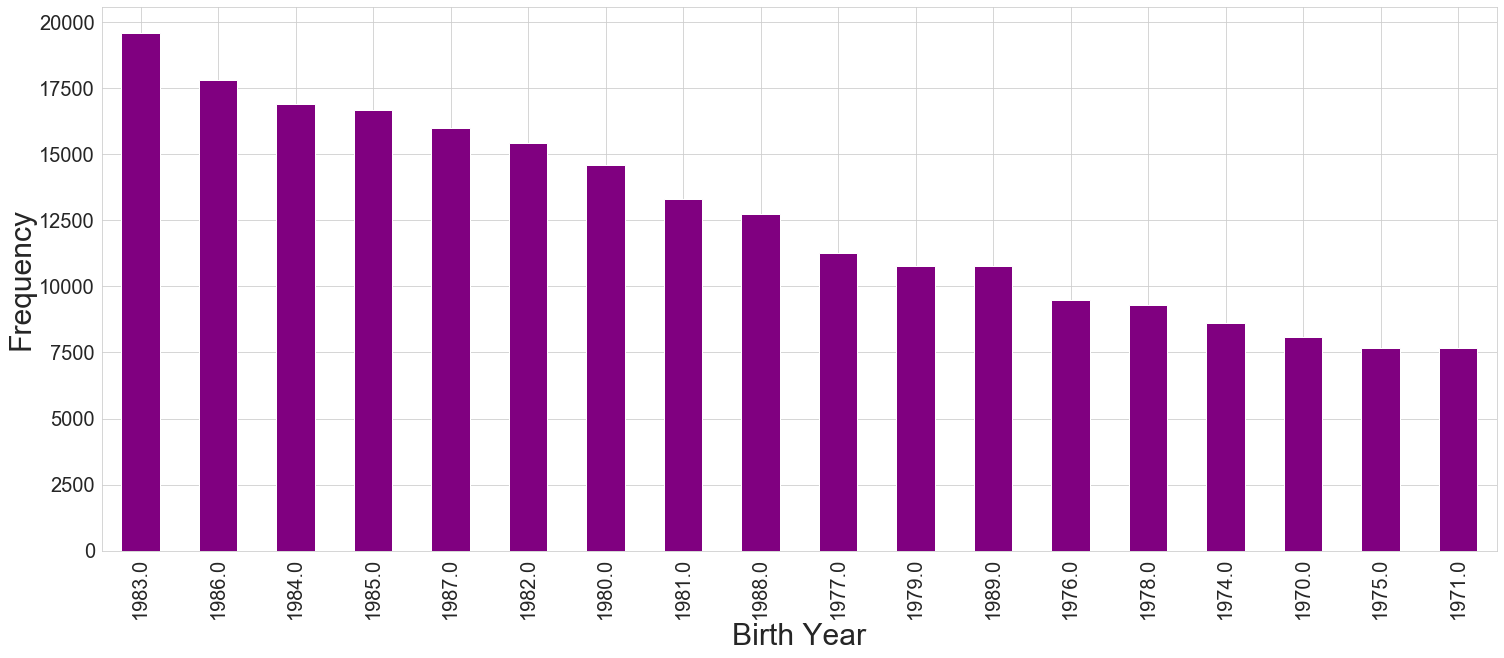

In [23]:
#birth date
# excercise 9.1
sub=ht['subsc_type']=='Registered'
reg=ht[sub]
bdayy=reg['birth_date'].value_counts()

b_day = pd.DataFrame(bdayy)

r_day = reg['birth_date'].value_counts()>7500

Dayb =b_day[r_day]

display(Dayb)

#visualization

Dayb.plot.bar(figsize=[25,10] , color="purple", legend=None)
plt.xlabel("Birth Year",fontsize= 30)
plt.ylabel('Frequency',fontsize= 30)
plt.yticks(fontsize= 20)
plt.xticks(fontsize= 20)
plt.show()

In [ ]:
"""
Answer/conclusion:
    By looking at our data we can see the distribution of our most frequent
    ages of the people that use the bikes. While visualizating the data we
    observe that the most frequent ages vary from 24 years old to 43 years old.
"""

,birth_date
1983.0,104
1987.0,95
1988.0,93
1984.0,87
1986.0,85
1989.0,85
1985.0,78
1982.0,73
1990.0,64
1981.0,58


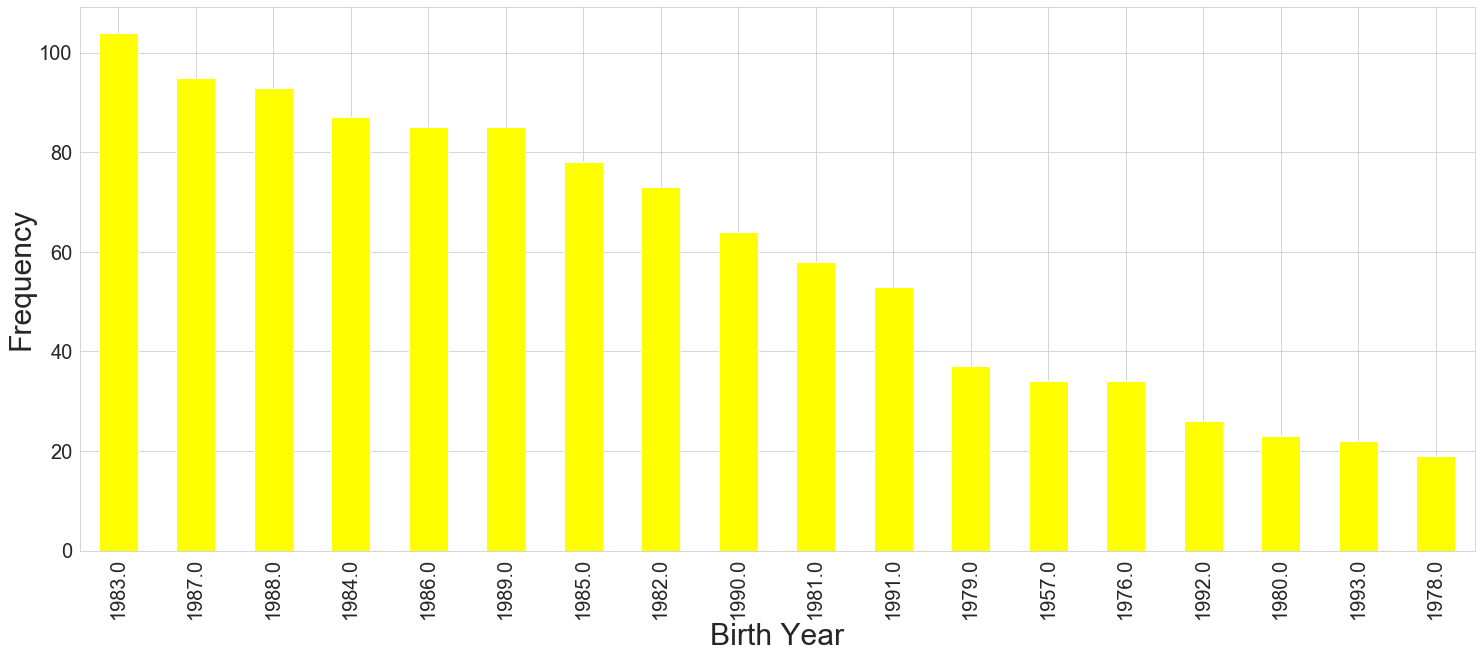

In [24]:
#excercise 9.2 Are all of the Hubway rentals at 2:00am by people under 25?

hourly2 = dfDatetime1['hour'] == 2

df2 = dfDatetime1[hourly2]

subsc=df2['subsc_type']=="Registered"

df3 = df2[subsc]

#display(df3)

age_2=df2['birth_date'].value_counts()
#print(age_2)

age_3 = pd.DataFrame(age_2)

filtro =df2['birth_date'].value_counts()>18

age2= age_3[filtro]
display(age2)

age2.plot.bar(figsize=[25,10] , color="yellow", legend=None)
plt.xlabel("Birth Year",fontsize= 30)
plt.ylabel('Frequency',fontsize= 30)
plt.yticks(fontsize= 20)
plt.xticks(fontsize= 20)
plt.show()

In [ ]:
"""Answer/ conclusion:
         By looking at the data visualization we can conclude that not all the users of 2Am are under
         25 years old,however; atleast 33% of the users of two am consist of people that range from the ages of 
         25 years old to 20 years old being the yungest. We also get some unexpected ages like the 33 
         persons that use the bikes at two am that are 57 years old."""

In [ ]:
"""
Question 10
Gender: Are there different top stations for male vs. female Hubway members?

  a) Analysis of data: In this exercise we needed the gender column so that we can see the 
  top stations for male vs. female Hubway members.
     
 
     
  b) Approach used to generate the answer: We used conditions to divide the males and female from the gender column 
  and then concatenate it and use value_counts() to count the males and females so we can plot it.
  
 
  

  c) Python source code: 


"""

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


Male      834714
Female    271700
Name: gender, dtype: int64


,gender
Male,834714
Female,271700


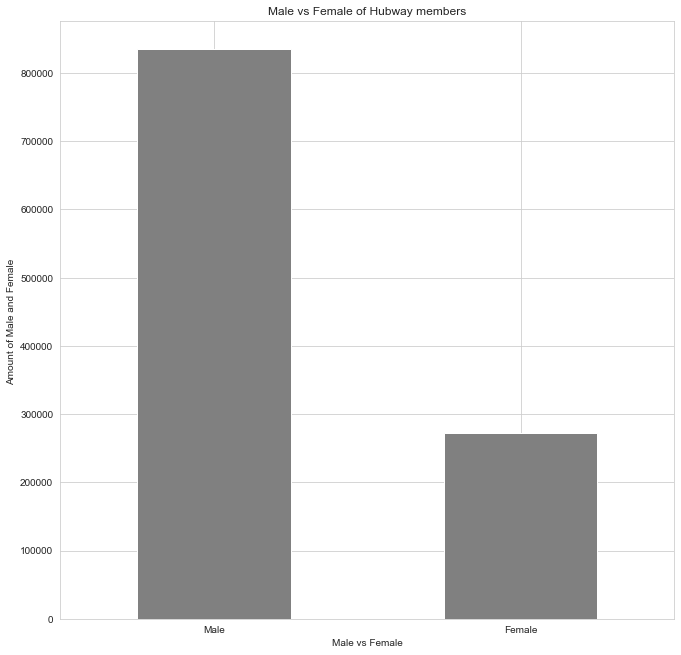

In [25]:
display(ht.head())

hubwayExtractMale = ht[ht['gender'] == 'Male']
hubwayExtractFemale = ht[ht['gender'] == 'Female']
hubwaySeriesMale = hubwayExtractMale['gender']
hubwaySeriesfemale = hubwayExtractFemale['gender']

genderUnited = pd.concat([hubwaySeriesMale, hubwaySeriesfemale]).value_counts()
print(genderUnited)
genderUnitedPd = pd.DataFrame(genderUnited)
display(genderUnitedPd)

#d) Data visualization
genderUnitedPd.plot(kind='bar', figsize = [11,11],color = "grey",legend=False)
plt.title('Male vs Female of Hubway members')
plt.xlabel('Male vs Female')
plt.ylabel('Amount of Male and Female ')
plt.xticks(rotation = 0)
plt.show() 

In [ ]:
"""

e) Answer/conclusion: We concluded that by looking at the visualization we were able to know the 
different top stations for male vs. female Hubway members and it seems like male is the largest one.

"""

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,strt_statn,end_statn,gender,Origin/Destinations pairs
0,23.0,23.0,Male,23.0/23.0
1,23.0,23.0,Male,23.0/23.0
2,23.0,23.0,Male,23.0/23.0
3,23.0,23.0,Female,23.0/23.0
4,23.0,23.0,Female,23.0/23.0


,strt_statn,end_statn,gender,Origin/Destinations pairs
387788,53.0,67.0,Male,53.0/67.0
391786,53.0,67.0,Female,53.0/67.0
402787,53.0,67.0,Male,53.0/67.0
404461,53.0,67.0,Male,53.0/67.0
406494,53.0,67.0,Male,53.0/67.0


Male      4158
Female     714
Name: gender, dtype: int64

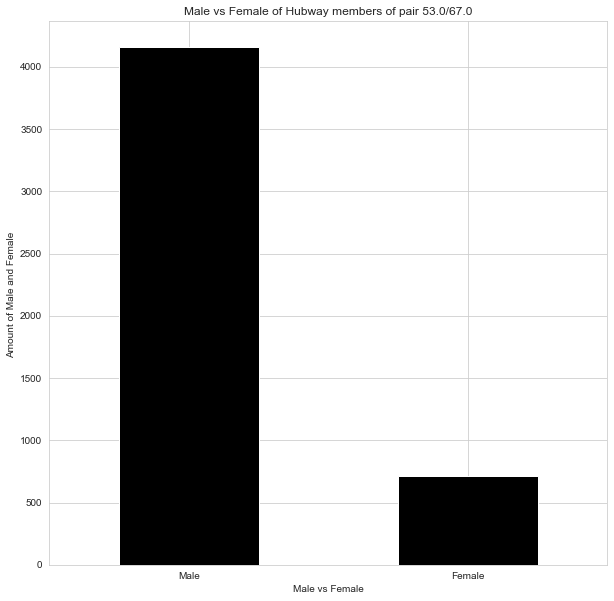

In [28]:
#Question 10 bonus

stationsExtract = ht[['strt_statn','end_statn','gender']]
stationsExtract['Origin/Destinations pairs'] = stationsExtract['strt_statn'].map(str) +'/'+ stationsExtract['end_statn'].map(str)
display(stationsExtract.head())

stationCondition = stationsExtract[stationsExtract['Origin/Destinations pairs'] == '53.0/67.0']
stationDropNA = stationCondition.dropna()
display(stationDropNA.head())
stationValue = stationDropNA['gender'].value_counts()
display(stationValue)

#d) Data visualization
stationValue.plot(kind='bar', figsize = [10,10],color = 'black') 
plt.title('Male vs Female of Hubway members of pair 53.0/67.0')
plt.xlabel('Male vs Female')
plt.ylabel('Amount of Male and Female ')
plt.xticks(rotation = 0)
plt.show() 